In [2]:
library(dplyr)
library(ggplot2)
library(patchwork)
library(reshape2)

In [8]:
pseu_tpm = read.csv("pseu_tpm.csv",header = T, row.names = 1)
pseu_tpm

,ARG2,TEX10,GALE,UNC5D,FBXL12,CUL5,SYK,FGD6,PLCL2,ZNF283,LPAR1,DHRS2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alpha.Sample101,568766.0,36396.079,51136.916,0.00000,73215.973,100629.647,56375.639,4072.9741,44787.436,26208.6407,22898.3718,15512.31
Alpha.Sample102,620614.7,18620.254,63030.705,0.00000,56421.259,74294.248,40837.443,9494.8781,22449.013,14337.4119,45373.7136,34526.36
Alpha.Sample103,605070.6,29352.438,37246.354,0.00000,59305.911,90446.769,27006.225,9964.3821,67681.937,4090.4721,31491.2919,38343.66
Alpha.Sample104,545477.1,56820.329,55937.765,0.00000,44388.692,93793.400,36909.528,7892.3182,43584.891,33267.4404,50933.9937,30994.50
Alpha.Sample105,622403.8,27073.370,64530.530,19.32544,71540.295,62502.564,30170.060,6680.2757,42315.990,7466.8506,30524.1327,34772.78
Alpha.Sample106,679607.9,35442.813,26159.529,0.00000,32535.620,80761.125,24786.444,10751.8990,23599.666,27236.6199,20839.1683,38279.18
Alpha.Sample107,162523.0,93376.706,28290.856,126.15720,175658.639,142280.475,50547.341,60590.8275,130307.069,10311.2063,123956.0599,22031.63
Alpha.Sample108,472957.5,44248.665,99783.106,0.00000,91727.078,98034.303,66332.414,13557.9640,38039.062,24977.1781,14001.7933,36340.94
Alpha.Sample109,446558.0,59837.500,54588.125,219.65119,89304.610,109546.194,72731.611,18242.6832,64558.350,14960.6253,46775.2444,22677.44


In [4]:
# per cell per gene zero count
zero_count = function(cell, data){
  zero_ratio_list = c()
  index = grep(cell, rownames(data))
  donor_num = length(index)
  for (i in 1:12) {
    zero_num = sum(data[index,i] == 0)
    zero_ratio = zero_num / donor_num
    zero_ratio_list = append(zero_ratio_list, zero_ratio)
  }
  return(zero_ratio_list)
}

In [9]:
alpha_zero_count = zero_count("Alpha", pseu_tpm)
beta_zero_count = zero_count("Beta",   pseu_tpm)
delta_zero_count = zero_count("Delta", pseu_tpm)
gamma_zero_count = zero_count("Gamma", pseu_tpm)
all_zero_count = as.data.frame(cbind(alpha_zero_count,beta_zero_count,delta_zero_count,gamma_zero_count))
rownames(all_zero_count) = colnames(pseu_tpm)

# barplot
bar_plot = function(cell,data,cc,title){
  values = data[,cell]
  plot_data = data.frame(gene = rownames(data), zero_ratio = values, stringsAsFactors = FALSE)
  plot_data$gene = factor(plot_data$gene, levels = rownames(data))
  ggplot(plot_data, aes(x = gene, y = zero_ratio)) +
    geom_col(fill = cc,color = "black") +
    theme(
      panel.background = element_rect(fill = "white"),  
      axis.line = element_line(color = "black"), 
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.title = element_text(size = 10),  
      plot.title = element_text(hjust = 0.5)  
    ) +
    ylim(0.00, 1.00) +
    geom_hline(yintercept = 0.3, linetype = "dashed", color = "red") +
    labs(title = title, x = "Gene", y = "Percentage")
}

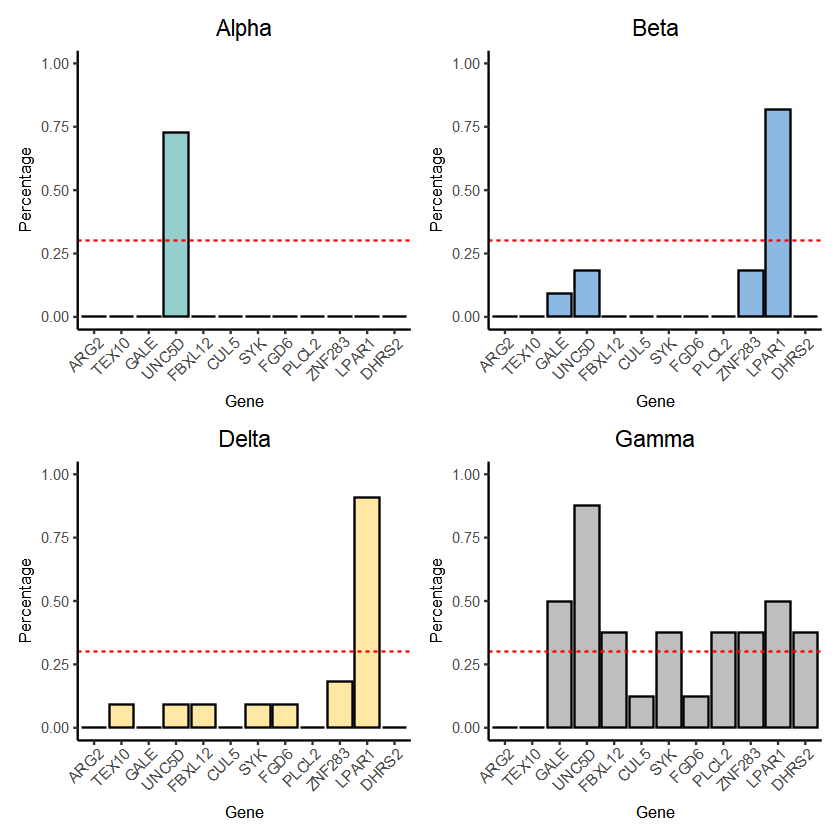

In [10]:
alpha_plot = bar_plot('alpha_zero_count', all_zero_count, '#95cfcd',"Alpha")
beta_plot = bar_plot('beta_zero_count', all_zero_count, '#8bb9e3','Beta')
delta_plot = bar_plot('delta_zero_count', all_zero_count, '#ffe8a3','Delta')
gamma_plot = bar_plot('gamma_zero_count', all_zero_count, 'gray','Gamma')

alpha_plot + beta_plot + delta_plot + gamma_plot + plot_layout(2,2)